In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('cudt.xlsx')
pd.pandas.set_option('display.max_columns',None) 

In [3]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [4]:
df.columns

Dic={'1Gender of respondent':'Gender','2 How old are you? ':'Age',
     '3 Which city do you shop online from?':'City','4 What is the Pin Code of where you shop online from?':'Pincode',
    '5 Since How Long You are Shopping Online ?':'ShoppingTimePeriod',
     '6 How many times you have made an online purchase in the past 1 year?':'Purchase(Last 1 year)',
     '7 How do you access the internet while shopping on-line?':'Internet Access',
     '8 Which device do you use to access the online shopping?':'Device',
     '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'ScreenSize',
     '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS',
     '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser',
     '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Channel Followed',
     '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'Visiting Mode',
     '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'ExplorationTime',
     '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'PaymentOption',
     '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'FreqencyOfAbudance',
     '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'ReasonOfAbudance',
     '18 The content on the website must be easy to read and understand':'ContentImportance',
     '19 Information on similar product to the one highlighted  is important for product comparison':'SimilarProductInfo',
     '20 Complete information on listed seller and product being offered is important for purchase decision.':'CompleteInfo',
     '21 All relevant information on listed products must be stated clearly':'ClearRelevantInfo',
       '22 Ease of navigation in website':'EaseOfNavg', '23 Loading and processing speed':'Speed',
       '24 User friendly Interface of the website':'UserFriendlyInterface',
       '25 Convenient Payment methods':'PaymentMethod',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust',
       '27 Empathy (readiness to assist with queries) towards the customers':'Empathy',
       '28 Being able to guarantee the privacy of the customer':'GuaranteePrivacy',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Responsiveness',
       '30 Online shopping gives monetary benefit and discounts':'Benefit&Discount',
       '31 Enjoyment is derived from shopping online':'EnjoymentDerived',
       '32 Shopping online is convenient and flexible':'Convenience&Flex.',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return&RepPolicy',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'loyaltyProg. Access',
       '35 Displaying quality Information on the website improves satisfaction of customers':'QualityInfo Display',
       '36 User derive satisfaction while shopping on a good quality website or application':'User Drive Satisf.',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'NetBenefitDerived',
       '38 User satisfaction cannot exist without trust':'UserSatisfaction=Trust',
       '39 Offering a wide variety of listed product in several category':'VarietyOffered',
       '40 Provision of complete and relevant product information':'RelevantInfo',
       '42 The Convenience of patronizing the online retailer':'PatroninzingCovinenvce',
       '43 Shopping on the website gives you the sense of adventure':'Adventureous',
       '44 Shopping on your preferred e-tailer enhances your social status':'SocialStatus',
       '45 You feel gratification shopping on your favorite e-tailer':'Gratification',
       '46 Shopping on the website helps you fulfill certain roles':'RolesFulfillment',
       '47 Getting value for money spent':'ValueForMoney',
     'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'RetailerChoice',
     'Easy to use website or application':'EaseOfUse',
       'Visual appealing web-page layout':'Web-pageLayout',
     'Wild variety of product on offer':'ProductVariety',
       'Complete, relevant description information of products':'Complete Description',
       'Fast loading website speed of website and application':'FastLoadingSpeed',
       'Reliability of the website or application':'Relaible',
       'Quickness to complete purchase':'PurchaseQuickness',
       'Availability of several payment options':'MultiPaymentMode',
       'Privacy of customers’ information':'PrivacyOfCustInfo',
       'Security of customer financial information':'CustSecurityInfo',
       'Presence of online assistance through multi-channel':'OnlineAssistance',
       'Longer time to get logged in (promotion, sales period)':'LongerLogInTime',
       'Longer time in displaying graphics and photos (promotion, sales period)':'LongerTimeforGraphics&Photo',
       'Late declaration of price (promotion, sales period)':'LateDecl.OfPrice',
       'Longer page loading time (promotion, sales period)':'LongerLoadingTime',
       'Limited mode of payment on most products (promotion, sales period)':'LimitedPaymentMode',
       'Longer delivery period':'Longer delivery Period', 'Change in website/Application design':'Change in Design',
       'Frequent disruption when moving from one page to another':'Frequent Disruption',
       'Website is as efficient as before':'Website Efficiency',
       'Which of the Indian online retailer would you recommend to a friend?':'RetailerRecommendation'
     
     
     
     
     
     
     
     
    }
df.rename(columns=Dic,inplace=True)

In [5]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'ShoppingTimePeriod',
       'Purchase(Last 1 year)', 'Internet Access', 'Device', 'ScreenSize',
       'OS', 'Browser', 'Channel Followed', 'Visiting Mode', 'ExplorationTime',
       'PaymentOption', 'FreqencyOfAbudance', 'ReasonOfAbudance',
       'ContentImportance', 'SimilarProductInfo', 'CompleteInfo',
       'ClearRelevantInfo', 'EaseOfNavg', 'Speed', 'UserFriendlyInterface',
       'PaymentMethod', 'Trust', 'Empathy', 'GuaranteePrivacy',
       'Responsiveness', 'Benefit&Discount', 'EnjoymentDerived',
       'Convenience&Flex.', 'Return&RepPolicy', 'loyaltyProg. Access',
       'QualityInfo Display', 'User Drive Satisf.', 'NetBenefitDerived',
       'UserSatisfaction=Trust', 'VarietyOffered', 'RelevantInfo',
       '41 Monetary savings', 'PatroninzingCovinenvce', 'Adventureous',
       'SocialStatus', 'Gratification', 'RolesFulfillment', 'ValueForMoney',
       'RetailerChoice', 'EaseOfUse', 'Web-pageLayout', 'ProductVariety',
       'C

In [6]:
df.head()

,Gender,Age,City,Pincode,ShoppingTimePeriod,Purchase(Last 1 year),Internet Access,Device,ScreenSize,OS,Browser,Channel Followed,Visiting Mode,ExplorationTime,PaymentOption,FreqencyOfAbudance,ReasonOfAbudance,ContentImportance,SimilarProductInfo,CompleteInfo,ClearRelevantInfo,EaseOfNavg,Speed,UserFriendlyInterface,PaymentMethod,Trust,Empathy,GuaranteePrivacy,Responsiveness,Benefit&Discount,EnjoymentDerived,Convenience&Flex.,Return&RepPolicy,loyaltyProg. Access,QualityInfo Display,User Drive Satisf.,NetBenefitDerived,UserSatisfaction=Trust,VarietyOffered,RelevantInfo,41 Monetary savings,PatroninzingCovinenvce,Adventureous,SocialStatus,Gratification,RolesFulfillment,ValueForMoney,RetailerChoice,EaseOfUse,Web-pageLayout,ProductVariety,Complete Description,FastLoadingSpeed,Relaible,PurchaseQuickness,MultiPaymentMode,Speedy order delivery,PrivacyOfCustInfo,CustSecurityInfo,Perceived Trustworthiness,OnlineAssistance,LongerLogInTime,LongerTimeforGraphics&Photo,LateDecl.OfPrice,LongerLoadingTime,LimitedPaymentMode,Longer delivery Period,Change in Design,Frequent Disruption,Website Efficiency,RetailerRecommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       269 non-null    object
 1   Age                          269 non-null    object
 2   City                         269 non-null    object
 3   Pincode                      269 non-null    int64 
 4   ShoppingTimePeriod           269 non-null    object
 5   Purchase(Last 1 year)        269 non-null    object
 6   Internet Access              269 non-null    object
 7   Device                       269 non-null    object
 8   ScreenSize                   269 non-null    object
 9   OS                           269 non-null    object
 10  Browser                      269 non-null    object
 11  Channel Followed             269 non-null    object
 12  Visiting Mode                269 non-null    object
 13  ExplorationTime              269 no

In [8]:
df.isnull().sum()

Gender                    0
Age                       0
City                      0
Pincode                   0
ShoppingTimePeriod        0
                         ..
Longer delivery Period    0
Change in Design          0
Frequent Disruption       0
Website Efficiency        0
RetailerRecommendation    0
Length: 71, dtype: int64

ValueError: Could not interpret input 'Which of the Indian online retailer would you recommend to a friend?'

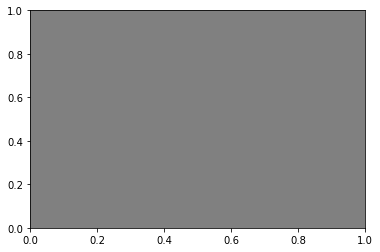

In [44]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x='Which of the Indian online retailer would you recommend to a friend?', hue='1Gender of respondent', data=df,palette="magma",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Site',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight="bold")
plt.show()


<AxesSubplot:>

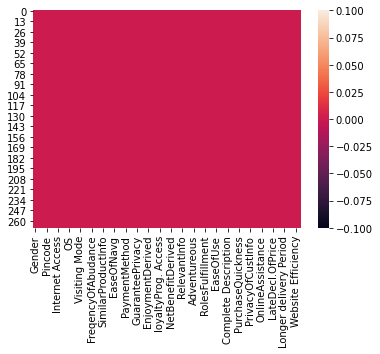

In [9]:
sns.heatmap(df.isnull())

In [10]:
for columns in df.columns:
    if df[columns].dtypes==object:
        print(str(columns) + '-' + str(df[columns].unique()))
        print(df[columns].value_counts())
        print("******************************************************************************************")

Gender-['Male' 'Female']
Female    181
Male       88
Name: Gender, dtype: int64
******************************************************************************************
Age-['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
******************************************************************************************
City-['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
******************************************************************************************
ShoppingTimePeriod-['Above 4 year

In [83]:
cat_cols1=['Gender', 'Age', 'City', 'ShoppingTimePeriod',
       'Purchase(Last 1 year)', 'Internet Access', 'Device', 'ScreenSize',
       'OS', 'Browser', 'Channel Followed', 'Visiting Mode', 'ExplorationTime']
cat_cols2=['PaymentOption', 'FreqencyOfAbudance', 'ReasonOfAbudance',
       'ContentImportance', 'SimilarProductInfo', 'CompleteInfo',
       'ClearRelevantInfo', 'EaseOfNavg', 'Speed', 'UserFriendlyInterface']
cat_cols3=['PaymentMethod', 'Trust', 'Empathy', 'GuaranteePrivacy',
         'Responsiveness', 'Benefit&Discount', 'EnjoymentDerived',
       'Convenience&Flex.', 'Return&RepPolicy', 'loyaltyProg. Access']
cat_cols4=['QualityInfo Display', 'User Drive Satisf.', 'NetBenefitDerived',
       'UserSatisfaction=Trust', 'VarietyOffered', 'RelevantInfo',
       '41 Monetary savings', 'PatroninzingCovinenvce', 'Adventureous']
cat_cols5=['SocialStatus', 'Gratification', 'RolesFulfillment', 'ValueForMoney',
       'RetailerChoice', 'EaseOfUse', 'Web-pageLayout', 'ProductVariety',
       'Complete Description', 'FastLoadingSpeed', 'Relaible']
cat_cols6=['PurchaseQuickness', 'MultiPaymentMode', 'Speedy order delivery ',
       'PrivacyOfCustInfo', 'CustSecurityInfo', 'Perceived Trustworthiness',
       'OnlineAssistance', 'LongerLogInTime', 'LongerTimeforGraphics&Photo']
cat_cols7=['LateDecl.OfPrice', 'LongerLoadingTime', 'LimitedPaymentMode',
       'Longer delivery Period', 'Change in Design', 'Frequent Disruption',
       'Website Efficiency', 'RetailerRecommendation']

In [84]:
print(list(enumerate(cat_cols1)))
print(list(enumerate(cat_cols2)))
print(list(enumerate(cat_cols3)))
print(list(enumerate(cat_cols4)))
print(list(enumerate(cat_cols5)))
print(list(enumerate(cat_cols6)))
print(list(enumerate(cat_cols7)))

[(0, 'Gender'), (1, 'Age'), (2, 'City'), (3, 'ShoppingTimePeriod'), (4, 'Purchase(Last 1 year)'), (5, 'Internet Access'), (6, 'Device'), (7, 'ScreenSize'), (8, 'OS'), (9, 'Browser'), (10, 'Channel Followed'), (11, 'Visiting Mode'), (12, 'ExplorationTime')]
[(0, 'PaymentOption'), (1, 'FreqencyOfAbudance'), (2, 'ReasonOfAbudance'), (3, 'ContentImportance'), (4, 'SimilarProductInfo'), (5, 'CompleteInfo'), (6, 'ClearRelevantInfo'), (7, 'EaseOfNavg'), (8, 'Speed'), (9, 'UserFriendlyInterface')]
[(0, 'PaymentMethod'), (1, 'Trust'), (2, 'Empathy'), (3, 'GuaranteePrivacy'), (4, 'Responsiveness'), (5, 'Benefit&Discount'), (6, 'EnjoymentDerived'), (7, 'Convenience&Flex.'), (8, 'Return&RepPolicy'), (9, 'loyaltyProg. Access')]
[(0, 'QualityInfo Display'), (1, 'User Drive Satisf.'), (2, 'NetBenefitDerived'), (3, 'UserSatisfaction=Trust'), (4, 'VarietyOffered'), (5, 'RelevantInfo'), (6, '41 Monetary savings'), (7, 'PatroninzingCovinenvce'), (8, 'Adventureous')]
[(0, 'SocialStatus'), (1, 'Gratificati

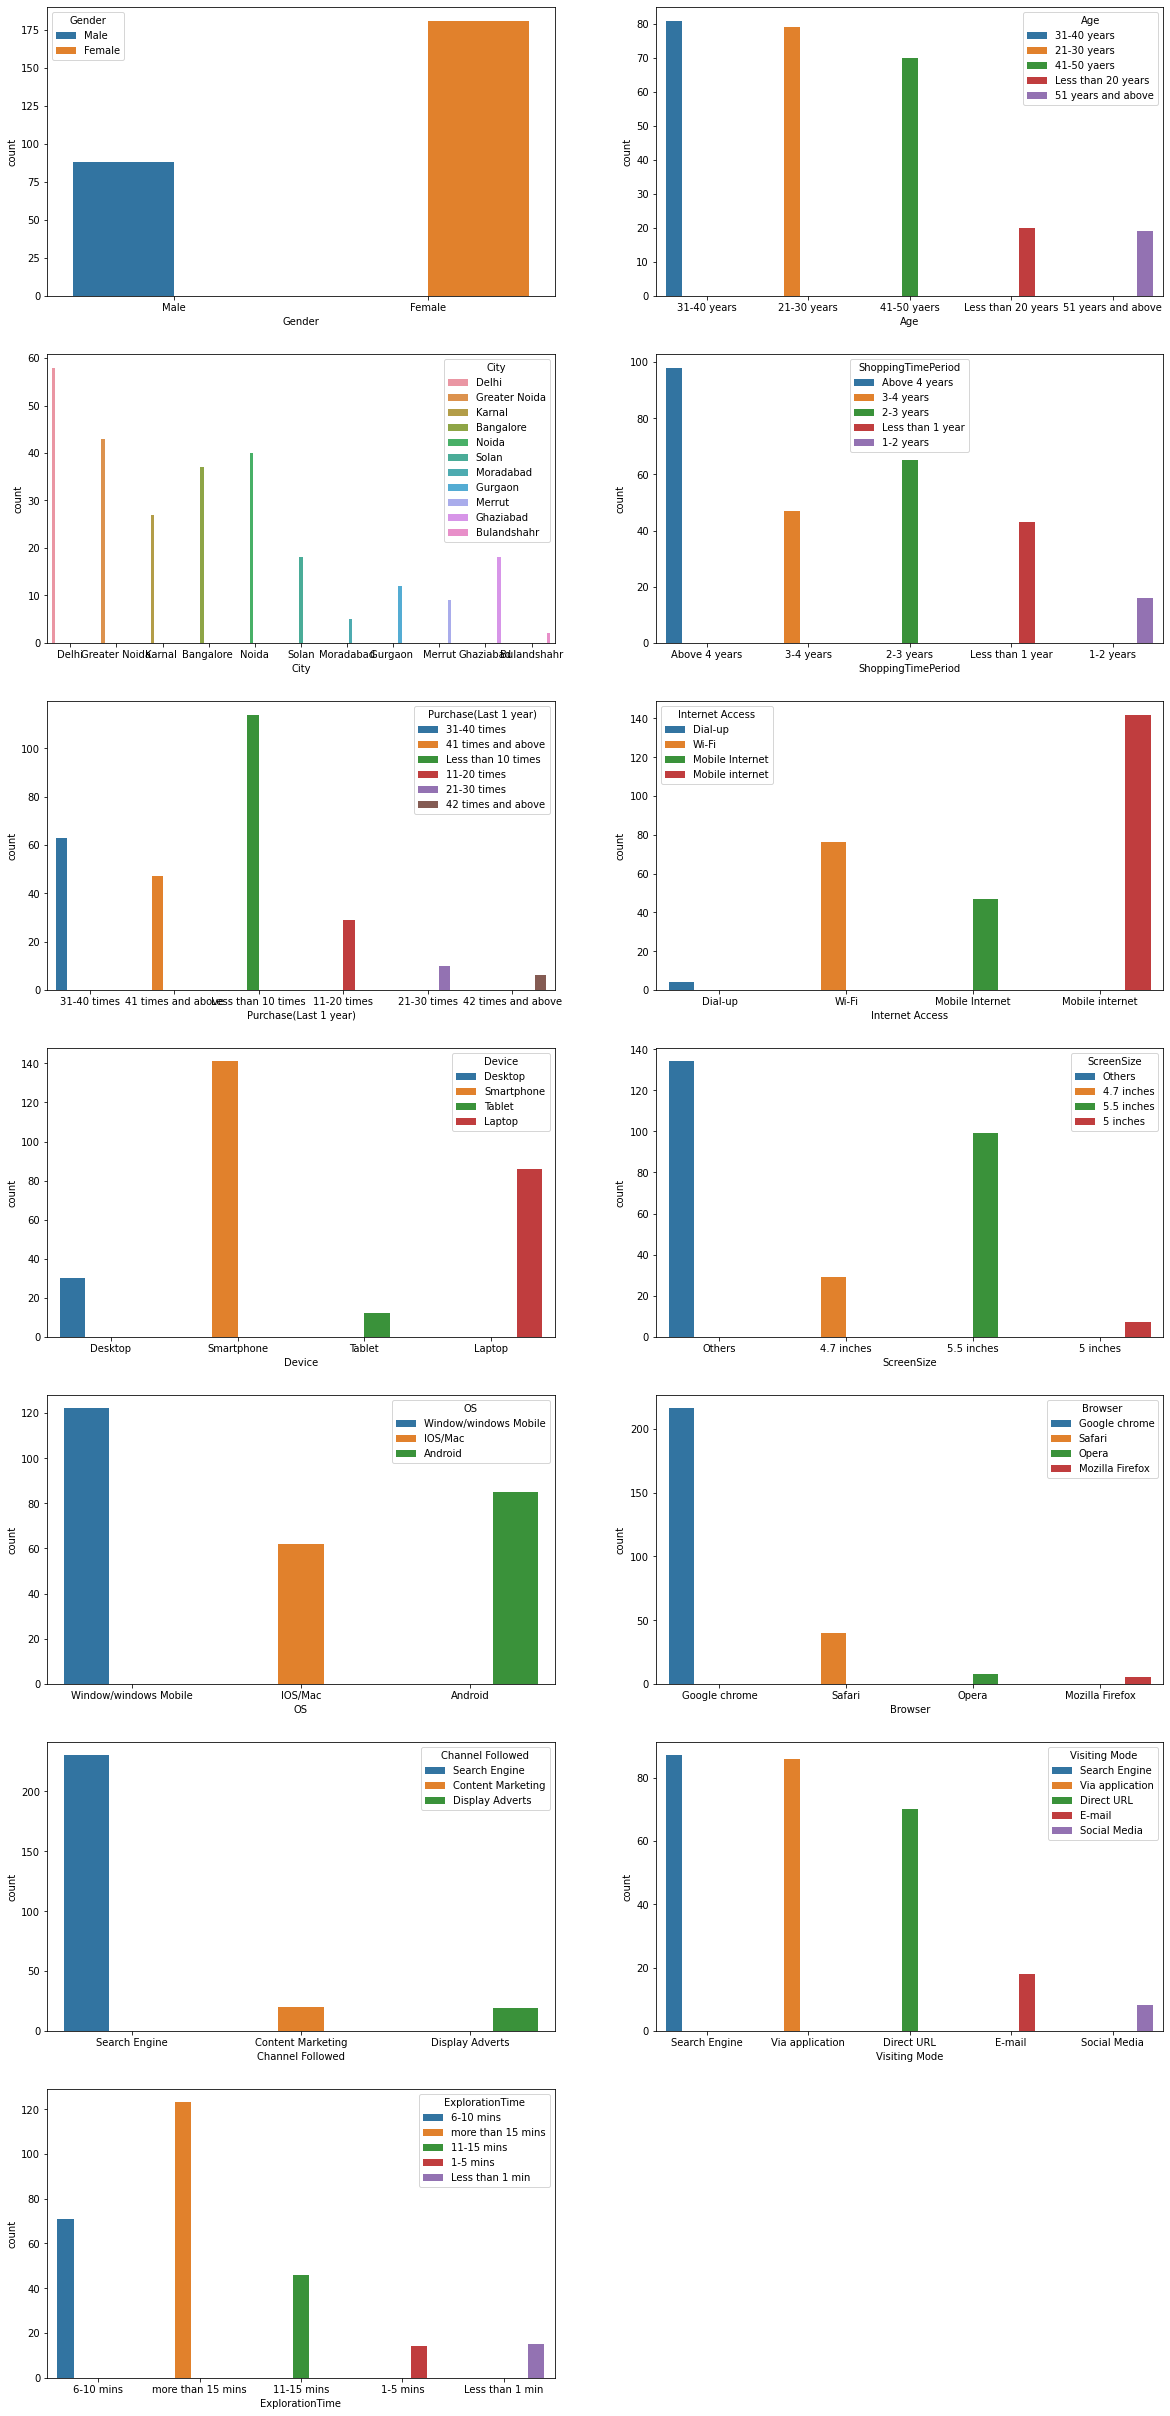

In [85]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,50))
for i in enumerate(cat_cols1):
        plt.subplot(8,2,i[0]+1)
        sns.countplot(i[1],hue=i[1],data=df)

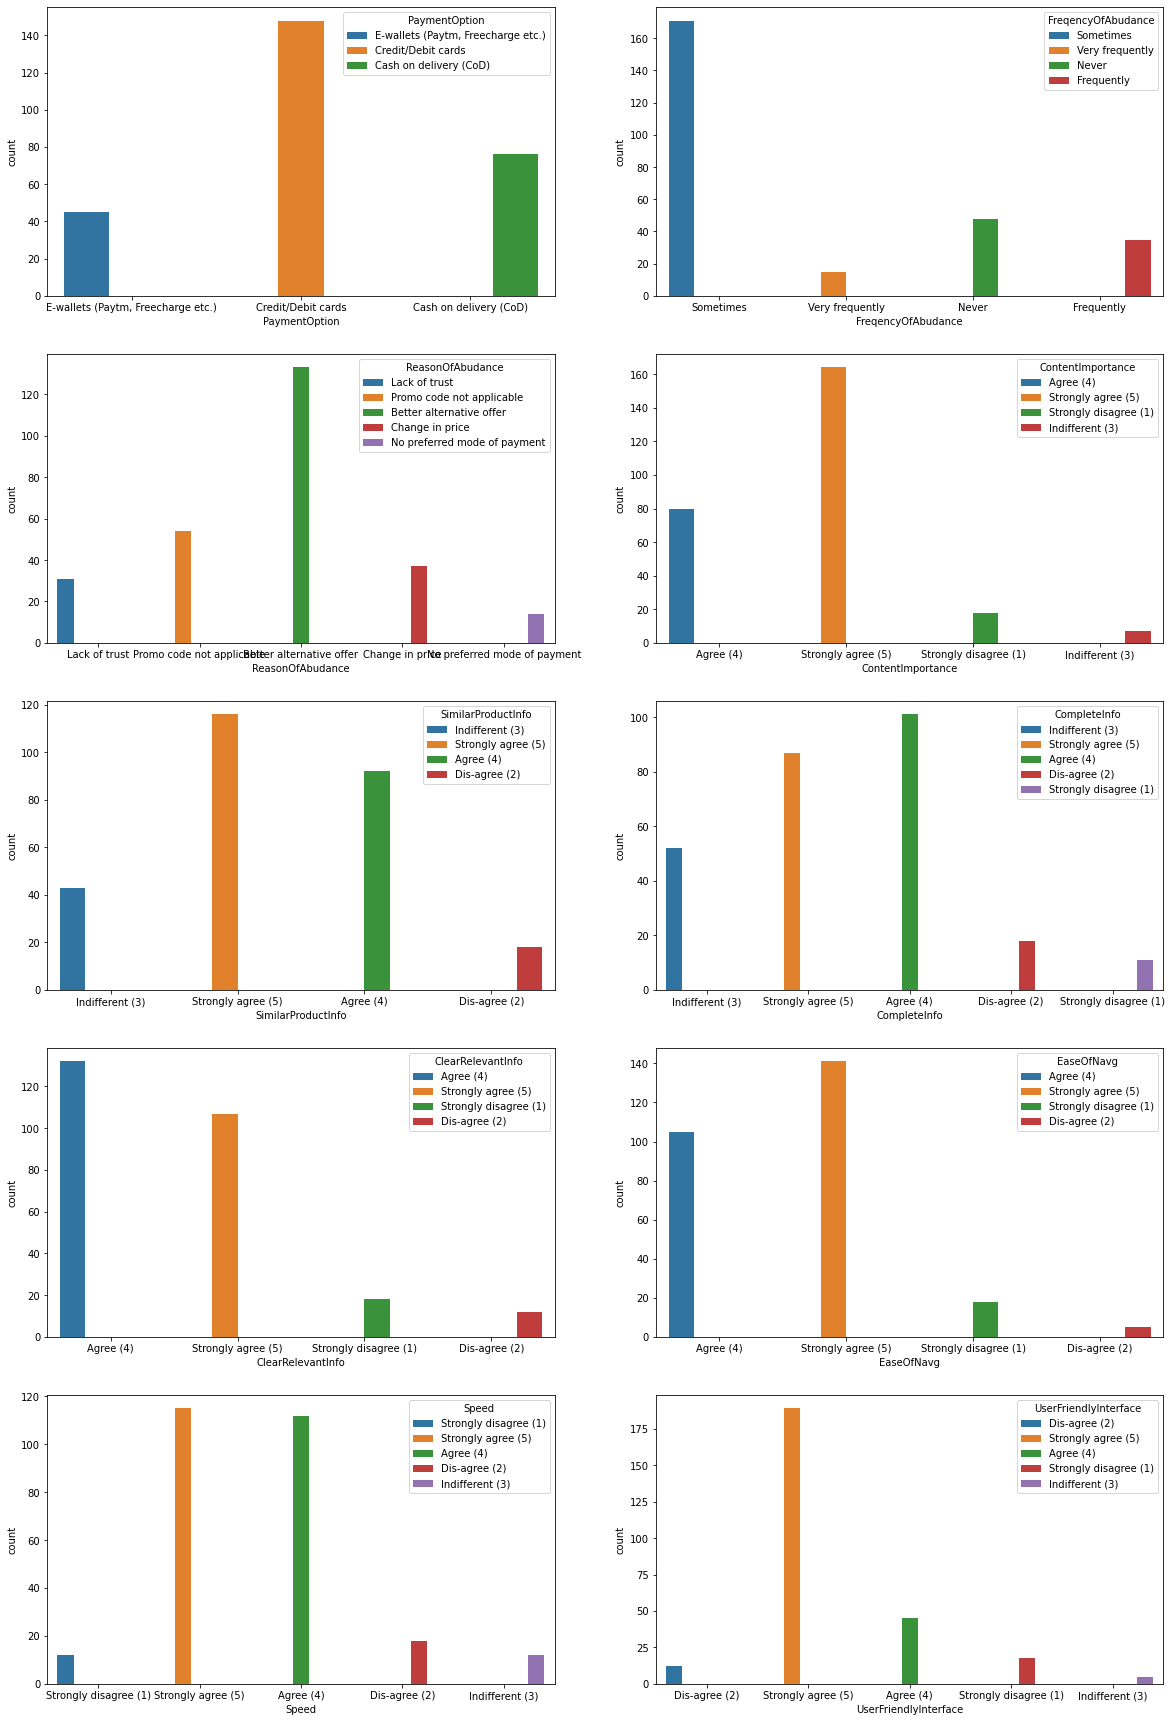

In [86]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,50))
for i in enumerate(cat_cols2):
        plt.subplot(8,2,i[0]+1)
        sns.countplot(i[1],hue=i[1],data=df)

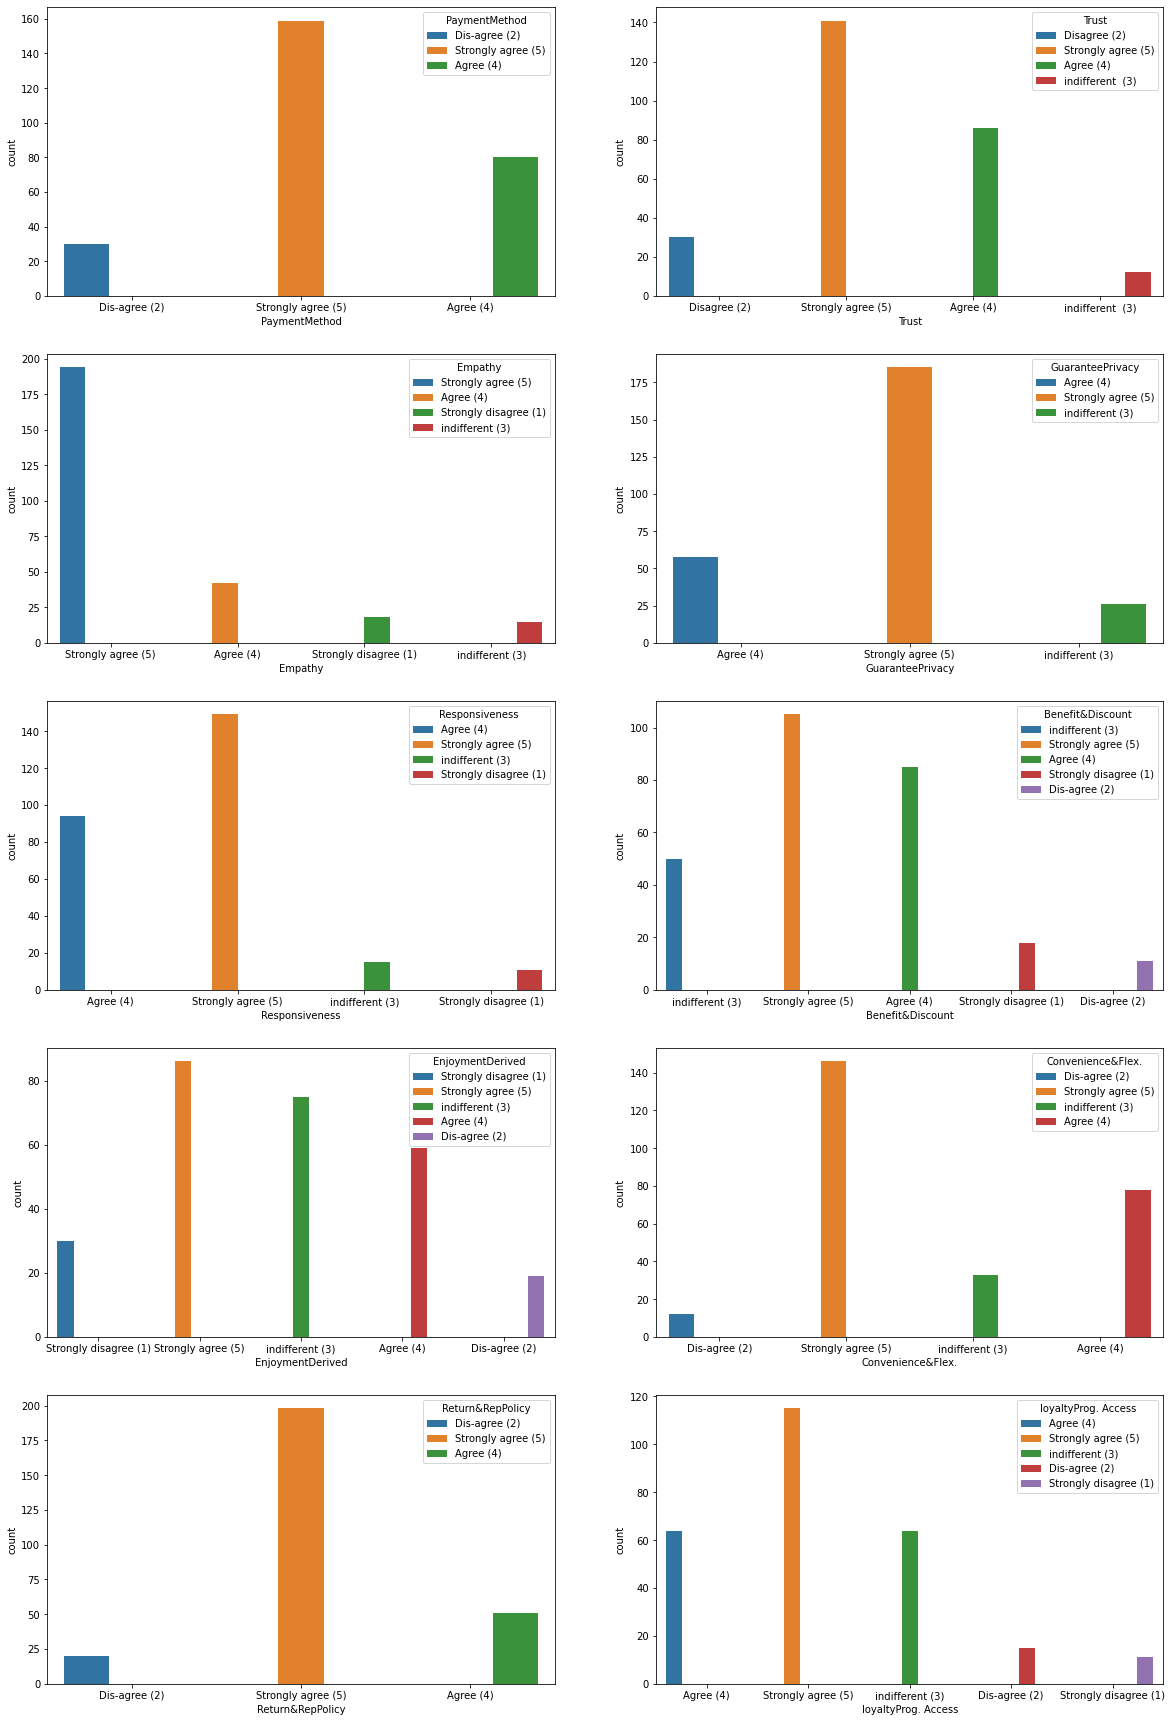

In [87]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,50))
for i in enumerate(cat_cols3):
        plt.subplot(8,2,i[0]+1)
        sns.countplot(i[1],hue=i[1],data=df)

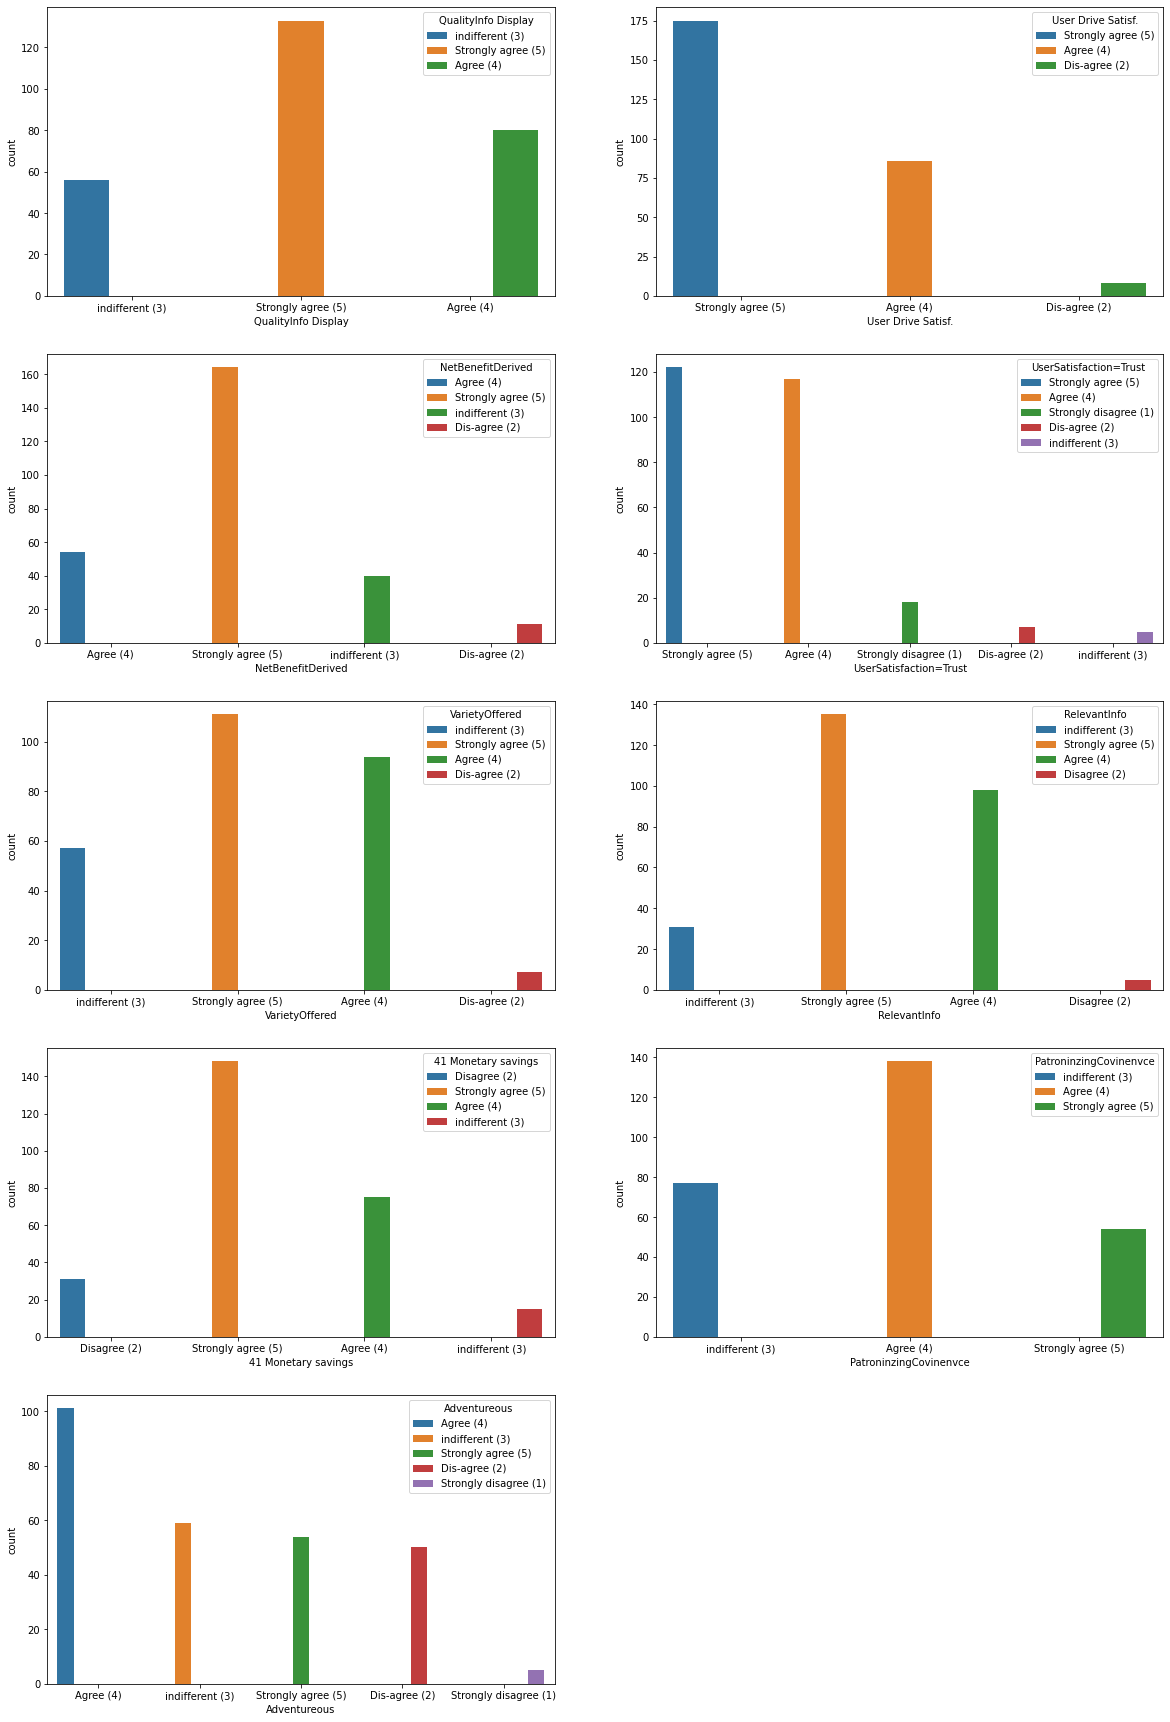

In [88]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,50))
for i in enumerate(cat_cols4):
        plt.subplot(8,2,i[0]+1)
        sns.countplot(i[1],hue=i[1],data=df)

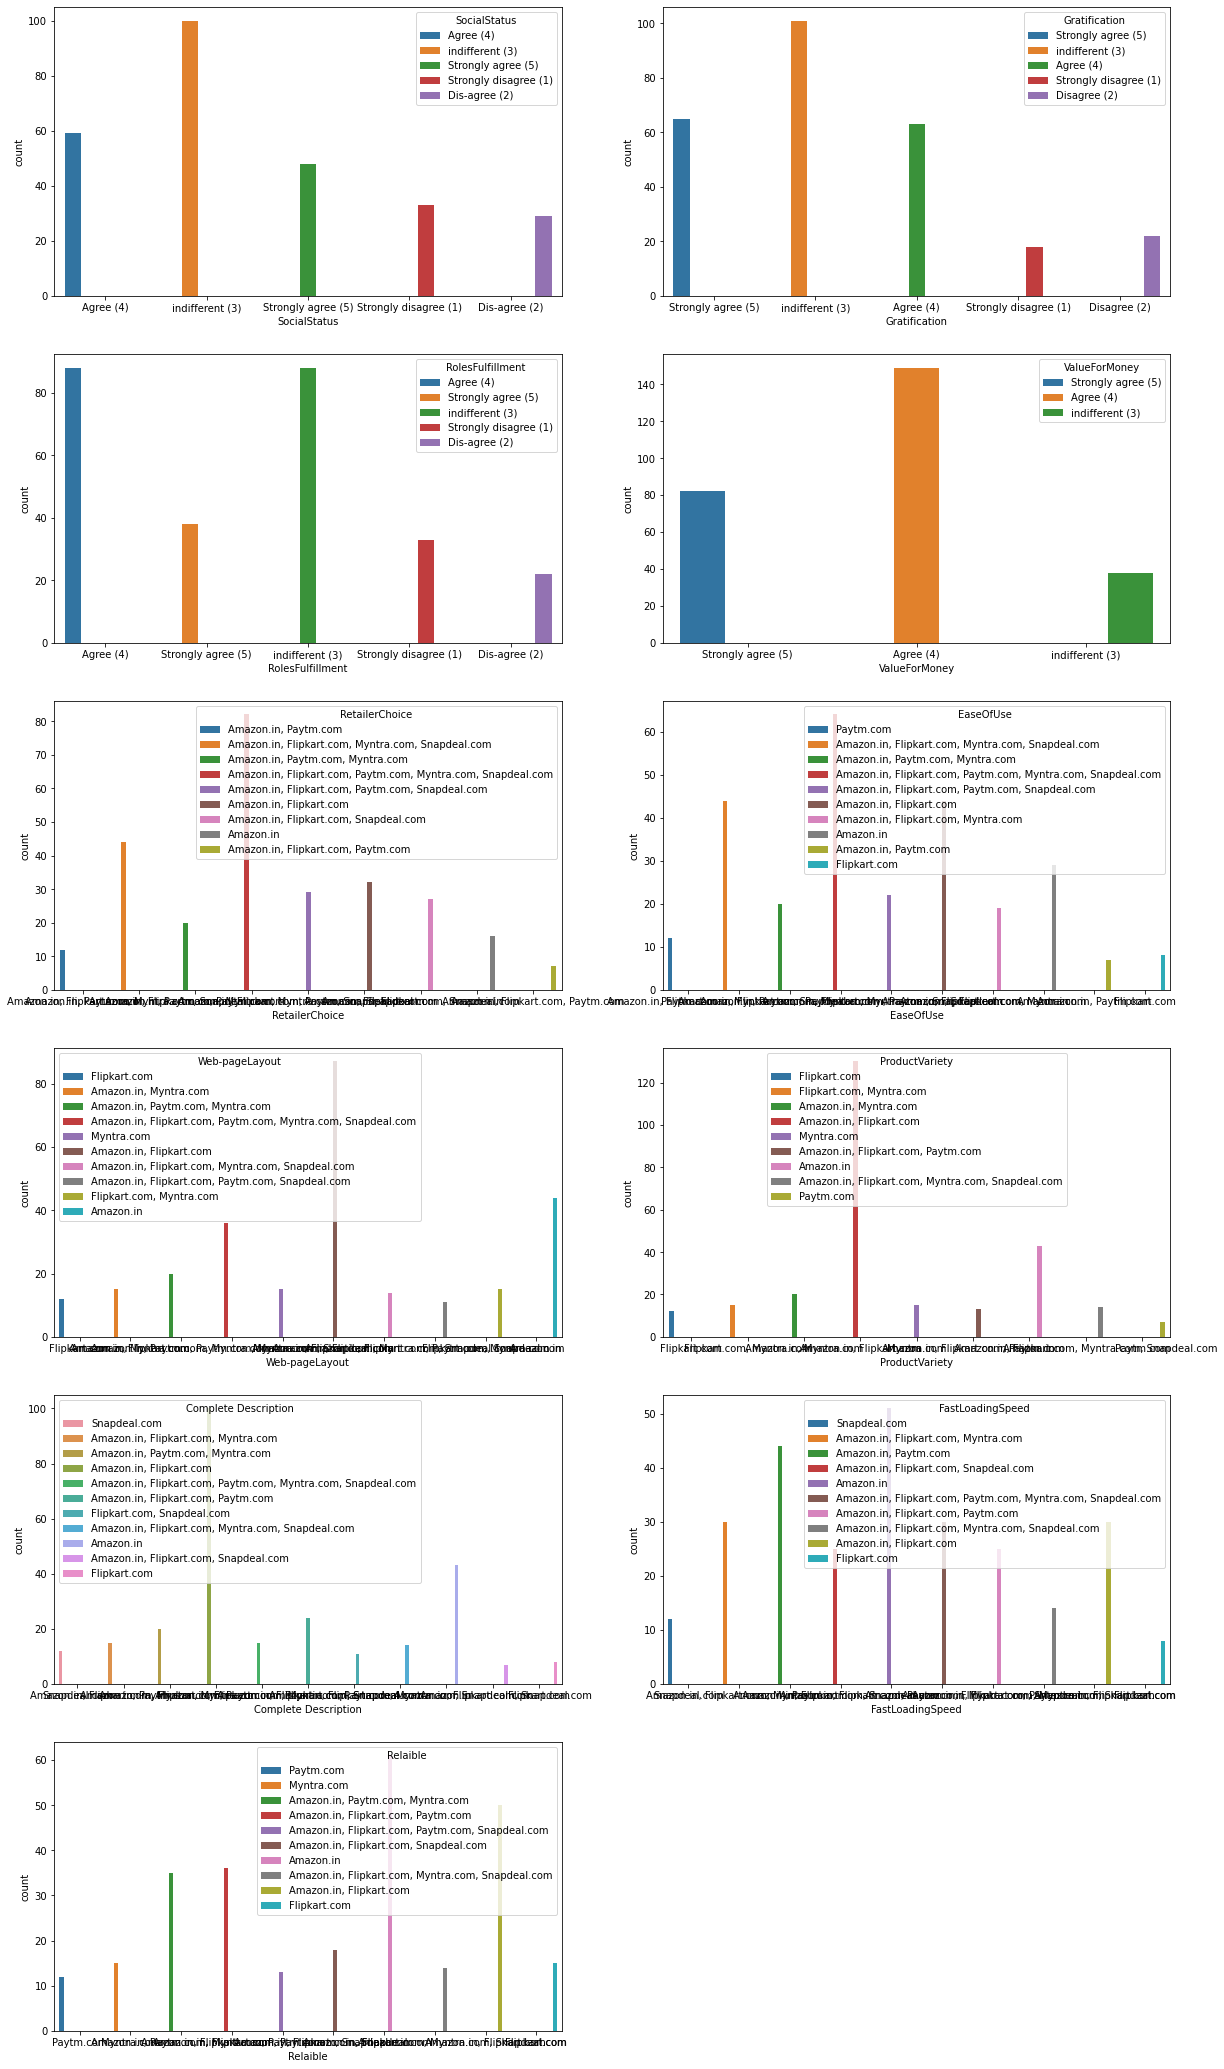

In [89]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,50))
for i in enumerate(cat_cols5):
        plt.subplot(8,2,i[0]+1)
        sns.countplot(i[1],hue=i[1],data=df)

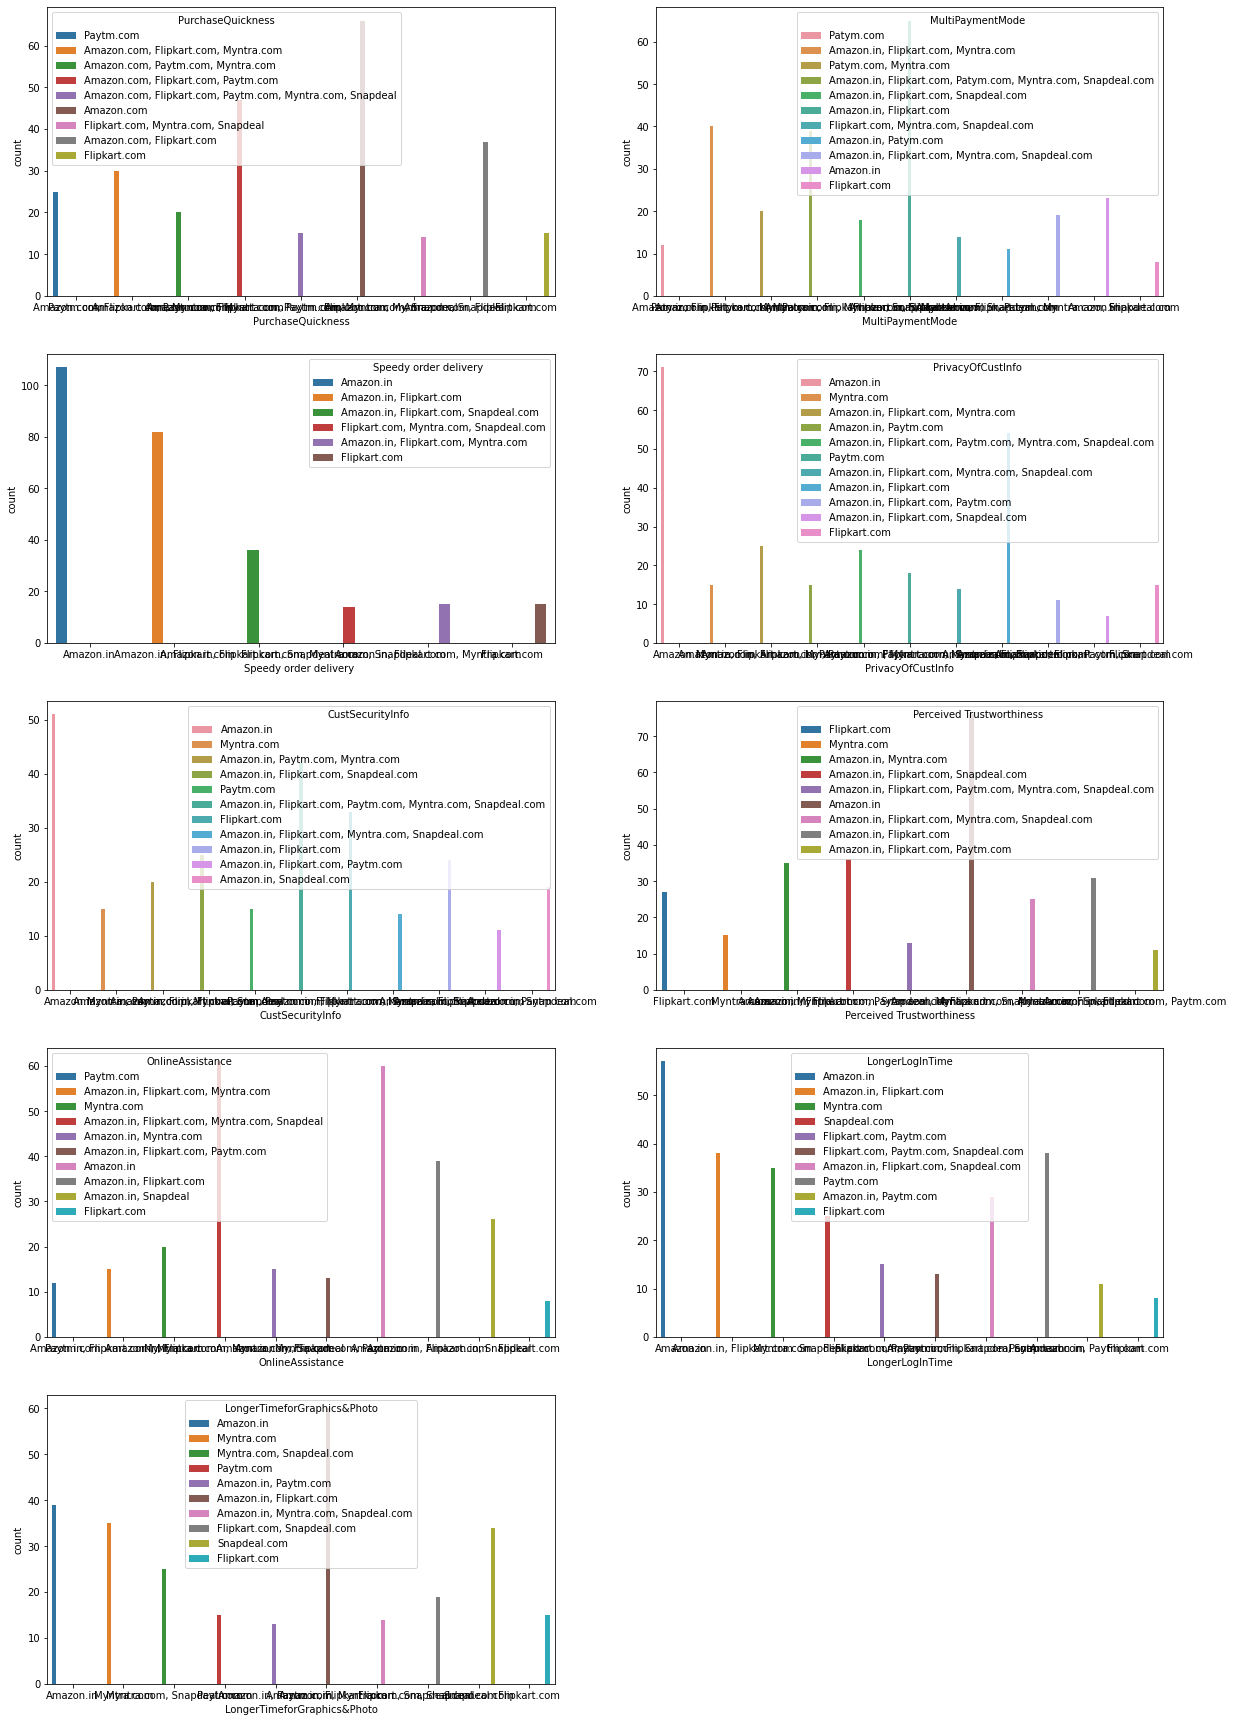

In [90]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,50))
for i in enumerate(cat_cols6):
        plt.subplot(8,2,i[0]+1)
        sns.countplot(i[1],hue=i[1],data=df)

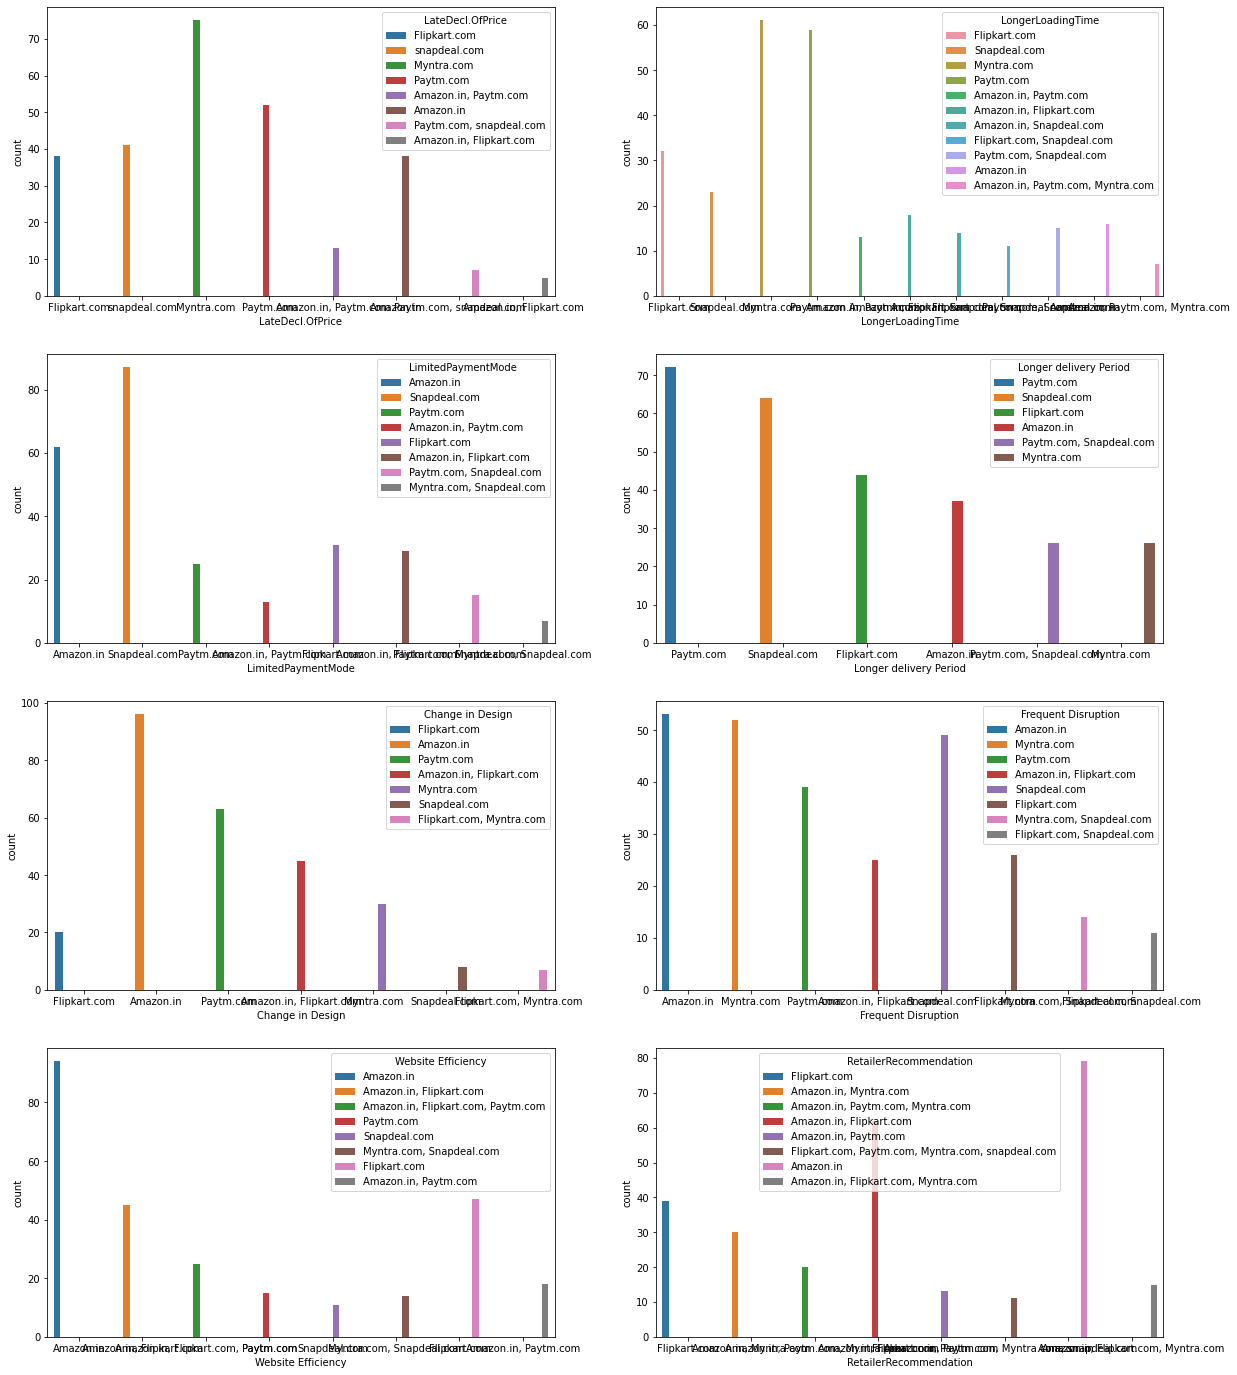

In [91]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,50))
for i in enumerate(cat_cols7):
        plt.subplot(8,2,i[0]+1)
        sns.countplot(i[1],hue=i[1],data=df)

In [ ]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

In [ ]:
sns.countplot(df['3 Which city do you shop online from?'])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")

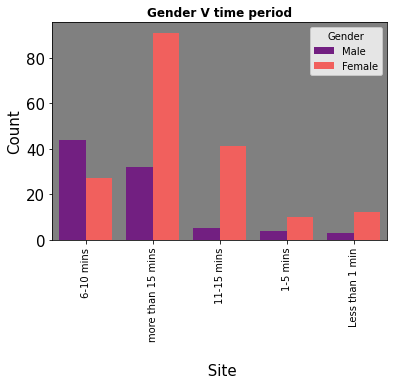

In [62]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x='ExplorationTime', hue='Gender', data=df,palette="magma",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Site',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Gender V time period',fontsize=12,fontweight="bold")
plt.show()

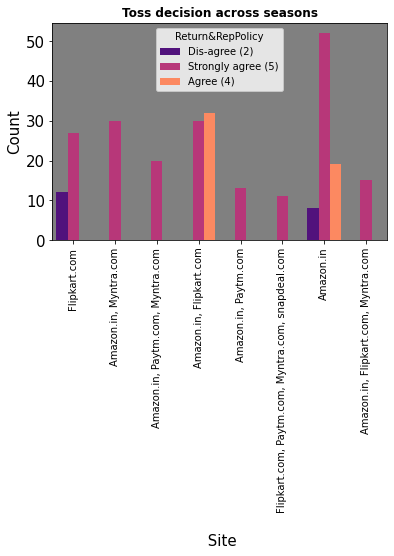

In [63]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x='RetailerRecommendation', hue='Return&RepPolicy', data=df,palette="magma",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Site',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight="bold")
plt.show()

In [66]:
new_data=pd.read_excel('new_cust.xlsx')

In [67]:
new_data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

In [76]:
new_data.groupby(Which of the Indian online retailer would you recommend to a friend?)['25 Convenient Payment methods'].plot.bar()   # beacuse we know our data has outliers
plt.xlabel(feature)
plt.ylabel('SalePrice')
plt.title(feature)
plt.show()

SyntaxError: invalid syntax (<ipython-input-76-fbce54db7a1a>, line 1)

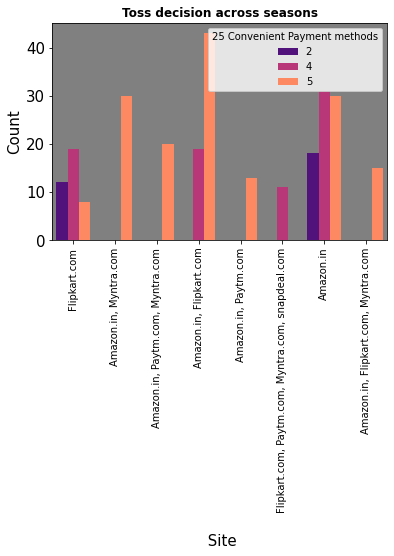

In [77]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x='Which of the Indian online retailer would you recommend to a friend?', hue='25 Convenient Payment methods', data=new_data,palette="magma",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Site',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight="bold")
plt.show()

In [12]:
site=list(df['RetailerRecommendation'])

In [13]:
len(site)

269

In [14]:
site

['Flipkart.com',
 'Amazon.in, Myntra.com',
 'Amazon.in, Paytm.com, Myntra.com',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Myntra.com',
 'Amazon.in, Paytm.com',
 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com',
 'Amazon.in',
 'Amazon.in',
 'Flipkart.com',
 'Amazon.in',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Flipkart.com, Myntra.com',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Paytm.com, Myntra.com',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Myntra.com',
 'Amazon.in, Paytm.com',
 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Myntra.com',
 'Amazon.in',
 'Amazon.in',
 'Flipkart.com',
 'Amazon.in',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Flipkart.com, Myntra.com',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Paytm.com, Myntra.com',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Myntra.com',
 'Flipkart.com',
 'Amazon.in, Myntra.com',
 'Amazon.in, Paytm.com, Myntra.com',
 'Amazon.in, Flipkart.com',
 'Amazon.in, Myntra.com',
 'Amazon.in, Paytm.com',
 'F

In [16]:
df["New"]= df["RetailerRecommendation"].str.split(",", n = 1, expand = True)

ValueError: Wrong number of items passed 2, placement implies 1

In [17]:
explode(df.assign(RetailerRecommendation=df.RetailerRecommendation.str.split(',')), 'RetailerRecommendation')

NameError: name 'explode' is not defined

In [19]:
data=df.copy()
print(data.set_index(data.columns.drop('RetailerRecommendation',1).tolist()).RetailerRecommendation.str.split(',', expand=True).stack().reset_index().rename(columns={0:'RetailerRecommendation'}).loc[:,data.columns])

     Gender                 Age           City  Pincode ShoppingTimePeriod  \
0      Male         31-40 years          Delhi   110009      Above 4 years   
1    Female         21-30 years          Delhi   110030      Above 4 years   
2    Female         21-30 years          Delhi   110030      Above 4 years   
3    Female         21-30 years  Greater Noida   201308          3-4 years   
4    Female         21-30 years  Greater Noida   201308          3-4 years   
..      ...                 ...            ...      ...                ...   
472  Female         21-30 years          Solan   173212          1-2 years   
473  Female         31-40 years      Ghaziabad   201008          1-2 years   
474  Female         41-50 yaers     Bangalore    560010          2-3 years   
475  Female  Less than 20 years          Solan   173229          2-3 years   
476  Female         41-50 yaers      Ghaziabad   201009          2-3 years   

    Purchase(Last 1 year)  Internet Access      Device  ScreenS

In [26]:
new_data=data.assign(RetailerRecommendation=df['RetailerRecommendation'].str.split(',')).explode('RetailerRecommendation')

In [27]:
new_data['RetailerRecommendation'].value_counts()

Amazon.in        219
 Flipkart.com     77
 Myntra.com       76
Flipkart.com      50
 Paytm.com        44
 snapdeal.com     11
Name: RetailerRecommendation, dtype: int64

In [36]:
data1=df.copy()

In [82]:
new_data.shape

(477, 71)

In [67]:
cul=['Website Efficiency','Frequent Disruption','Change in Design','Longer delivery Period',
'LimitedPaymentMode','LongerLoadingTime','LateDecl.OfPrice',
'LongerTimeforGraphics&Photo','LongerLogInTime','OnlineAssistance','Perceived Trustworthiness',
'CustSecurityInfo','PrivacyOfCustInfo','Website Efficiency','Frequent Disruption','Change in Design','Longer delivery Period',
'LimitedPaymentMode','LongerLoadingTime','LateDecl.OfPrice',
'LongerTimeforGraphics&Photo','LongerLogInTime','OnlineAssistance','Perceived Trustworthiness',
'CustSecurityInfo','PrivacyOfCustInfo','MultiPaymentMode','PurchaseQuickness',
'Relaible','FastLoadingSpeed','Complete Description','RetailerChoice',
'EaseOfUse','Web-pageLayout','ProductVariety'
,'MultiPaymentMode','PurchaseQuickness',
'Relaible','FastLoadingSpeed','Complete Description','RetailerChoice',
'EaseOfUse','Web-pageLayout','ProductVariety'
]

In [71]:
app=

In [79]:
x1=data1.set_index(['Gender']).apply(lambda x: data1['RetailerChoice','EaseOfUse'].str.split(',').explode()).reset_index().reindex(data1.columns,axis=1)

KeyError: ('RetailerChoice', 'EaseOfUse')

In [65]:
x1['ProductVariety']

0       Flipkart.com
1       Flipkart.com
2         Myntra.com
3          Amazon.in
4         Myntra.com
           ...      
497        Amazon.in
498     Flipkart.com
499       Myntra.com
500     Snapdeal.com
501        Amazon.in
Name: ProductVariety, Length: 502, dtype: object

In [53]:
n1 = pd.DataFrame({'var1': ['a,b,c', 'd,e,f'], 
                   'var2': ['i,j,k', 'l,m,n'], 
                   'var3': [1, 2]})

In [54]:
n1

,var1,var2,var3
0,"a,b,c","i,j,k",1
1,"d,e,f","l,m,n",2


In [58]:
print(n1.set_index(['var3']).apply(lambda col: col.str.split(',').explode()).reset_index().reindex(n1.columns, axis=1))

  var1 var2  var3
0    a    i     1
1    b    j     1
2    c    k     1
3    d    l     2
4    e    m     2
5    f    n     2
